In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
electricity = pd.read_csv('../../data/computation/electricity_end_use.csv')
electricity = electricity[electricity.Description == 'Electricity End Use, Total'] # we will look at total electricity end-use
electricity['YYYYMM'] = electricity['YYYYMM'].astype(str)
electricity['YYYY'] = electricity.YYYYMM.str[:4]
electricity['Value'] = electricity['Value'].astype(float)
electricity['annual end use'] = electricity.groupby('YYYY')['Value'].transform('sum')
electricity.drop_duplicates('YYYY', inplace=True)
electricity.reset_index()
electricity = electricity.drop('Column_Order', axis=1)
electricity = electricity.drop('MSN', axis=1)
electricity = electricity.drop('YYYYMM', axis=1)
# 2023 only has 11 months
electricity.YYYY = pd.to_datetime(electricity['YYYY'], format='%Y')
electricity = electricity.drop(4784)
display(electricity)

,Value,Description,Unit,YYYY,annual end use
4110,254511.334,"Electricity End Use, Total",Million Kilowatthours,1949-01-01,254511.334
4111,291443.326,"Electricity End Use, Total",Million Kilowatthours,1950-01-01,291443.326
4112,330284.583,"Electricity End Use, Total",Million Kilowatthours,1951-01-01,330284.583
4113,356163.960,"Electricity End Use, Total",Million Kilowatthours,1952-01-01,356163.960
4114,396216.896,"Electricity End Use, Total",Million Kilowatthours,1953-01-01,396216.896
...,...,...,...,...,...
4719,356864.175,"Electricity End Use, Total",Million Kilowatthours,2018-01-01,8006177.987
4732,341137.223,"Electricity End Use, Total",Million Kilowatthours,2019-01-01,7908841.601
4745,328246.135,"Electricity End Use, Total",Million Kilowatthours,2020-01-01,7712754.043
4758,333976.530,"Electricity End Use, Total",Million Kilowatthours,2021-01-01,7889578.642


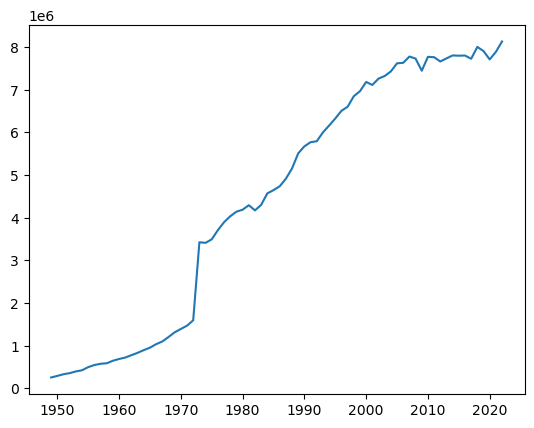

In [7]:
plt.plot(electricity['YYYY'],electricity['annual end use'])

In [8]:
compute = pd.read_csv('../../data/computation/systems_compute.csv')
compute = compute[['System','Training compute (FLOP)','Publication date']]
compute = compute.dropna()
compute.columns = [c.replace(' ', '_') for c in compute.columns]
compute.rename({'Training_compute_(FLOP)': 'Training_compute_FLOP'}, axis=1, inplace=True)
compute.Publication_date = pd.to_datetime(compute['Publication_date'], format='%Y-%m-%d')
display(compute)

,System,Training_compute_FLOP,Publication_date
3,KEPLER,124000000000000000000,2020-11-23
7,Wu Dao - Wen Yuan,650280960000000000000,2021-01-11
8,iGPT-L,8.91e+21,2020-06-17
9,VD-LSTM+REAL Large,21300000000000000,2016-11-04
19,GPT,17578125000000000000,2018-06-01
...,...,...,...
1395,Cerebras-GPT-13B,2.3e+22,2023-04-06
1399,GBERT-Large,2.24446464e+21,2020-10-21
1400,BERT-Large-CAS (PTB+WT2+WT103),521000000000000000000,2019-04-20
1402,ERNIE-Doc (247M),29100000000000000000,2020-12-31


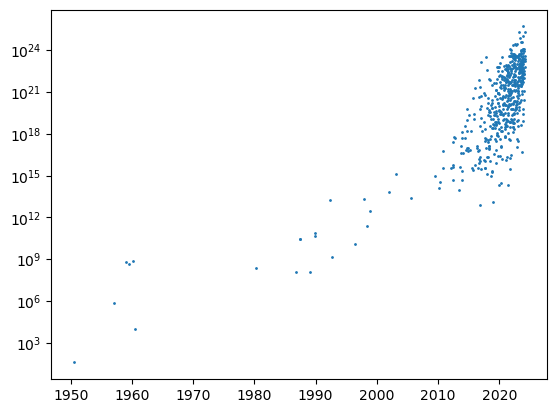

In [9]:
compute['Training_compute_FLOP'] = compute['Training_compute_FLOP'].astype(float)
plt.yscale("log")
plt.scatter(compute['Publication_date'], compute['Training_compute_FLOP'], s=1)

In [31]:
data_cost = pd.read_csv('../../data/computation/memory_cost.csv')
data_cost.Year = pd.to_datetime(data_cost['Year'], format='%Y')
data_cost = data_cost.drop('Entity', axis=1)
data_cost = data_cost.drop('Code', axis=1)
data_cost = data_cost.sort_values(by='Year')
data_cost = data_cost.set_index('Year')
# data_cost.drop_duplicates(subset='Year')
# data_cost = data_cost.dropna()
# compute = compute.drop(compute.columns.difference(['System','Training compute (FLOP)','Publication date']), 1, inplace=True)
display(data_cost)

,memory,flash,disk_drives,ssd
Year,,,,
1956-01-01,NaN,NaN,9.200000e+09,NaN
1957-01-01,4.110418e+14,NaN,NaN,NaN
1959-01-01,6.794772e+13,NaN,7.600000e+09,NaN
1960-01-01,5.242880e+12,NaN,3.600000e+09,NaN
1964-01-01,NaN,NaN,3.518620e+09,NaN
1965-01-01,2.642412e+12,NaN,NaN,NaN
1966-01-01,NaN,NaN,1.047260e+09,NaN
1970-01-01,7.340030e+11,NaN,2.597000e+08,NaN
1973-01-01,3.993600e+11,NaN,NaN,NaN


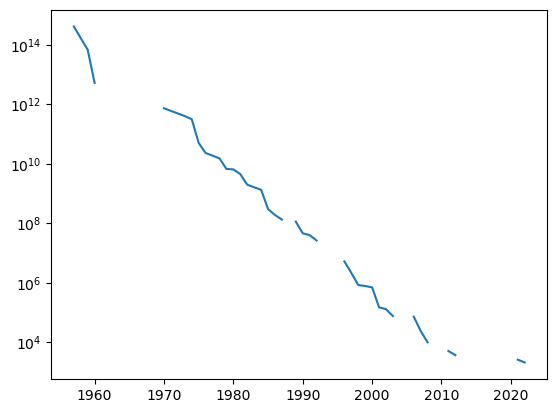

In [34]:
plt.yscale("log")
plt.plot(data_cost.index,data_cost['memory'])
# plt.plot(data_cost.index,data_cost['disk_drives'])
# plt.plot(data_cost.index,data_cost['ssd'])